In [ ]:
import pandas as pd

In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/spam.csv"

In [ ]:
df=pd.read_csv(path,encoding="ISO-8859-1")

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#now remove unnamed 3 columns from the dataframe

In [ ]:
df=df[['v1','v2']]

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

#rename the data set columns

In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
df.sample(10)

,target,text
697,ham,meet you in corporation st outside gap Û_ you...
2036,ham,You can jot down things you want to remember l...
1269,ham,"Tee hee. Off to lecture, cheery bye bye."
5518,ham,"By the way, i've put a skip right outside the ..."
1857,ham,I hate when she does this. She turns what shou...
2560,ham,Are you still getting the goods.
2539,ham,Hmmm:)how many players selected?
3962,ham,If you ask her or she say any please message.
2217,ham,* Will have two more cartons off u and is very...
4622,ham,U need my presnts always bcz U cant mis love. ...


In [ ]:
df['target'].unique()

array(['ham', 'spam'], dtype=object)

#Remove extra scape ,commas,and extra spacial character

In [ ]:
import string

def remove_punctuation(text):
  for punctuation in string.punctuation:
    text=text.replace(punctuation,'')
  return text

In [ ]:
df['text']=df['text'].apply(remove_punctuation)

In [ ]:
df.head(10)

,target,text
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I dont think he goes to usf he lives aroun...
5,spam,FreeMsg Hey there darling its been 3 weeks now...
6,ham,Even my brother is not like to speak with me T...
7,ham,As per your request Melle Melle Oru Minnaminun...
8,spam,WINNER As a valued network customer you have b...
9,spam,Had your mobile 11 months or more U R entitled...


In [ ]:
df.describe()

,target,text
count,5572,5572
unique,2,5144
top,ham,Sorry Ill call later
freq,4825,30


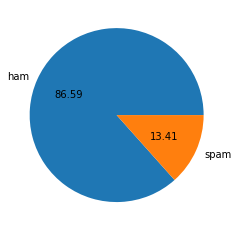

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

#check duplicate data and remove it

In [ ]:
df['text'].duplicated().sum()

428

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df['target'].value_counts()

ham     4501
spam     643
Name: target, dtype: int64

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters'] = df['text'].apply(len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.sample(20)

,target,text,num_characters,num_words,num_sentences
166,spam,URGENT We are trying to contact you Last weeke...,152,27,1
4722,ham,HELLO PEACH MY CAKE TASTS LUSH,30,6,1
513,ham,Nojst change tat only,21,4,1
3470,ham,Heart is empty without love Mind is empty with...,165,31,1
4158,ham,Now got tv 2 watch meh U no work today,38,10,1
1299,ham,Great to hear you are settling well So whats h...,61,12,1
5036,ham,You didnt hear it from me,25,6,1
919,ham,Dont talk to him ever ok its my word,36,9,1
4954,ham,Doing my masters When will you buy a bb cos i ...,71,17,1
3715,ham,Networking technical support associate,38,4,1


In [ ]:
df1=df